In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
path_to_file ='./images/T.JPG'

In [23]:
# Load image and convert to grayscale

image = cv2.imread(path_to_file)

cv2.imshow('Where is this?', image)
cv2.waitKey(1)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load bigger image
bigger_image = cv2.imread(path_to_file, 0)

result = cv2.matchTemplate(gray, bigger_image, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Create bounding box
top_left = max_loc
bottom_right = (top_left[0] + 100, top_left[1] + 100)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 10)

cv2.imshow('Where is input image?', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(Text(0.5, 1.0, 'Canny edge detection is great'), ([], []), ([], []))

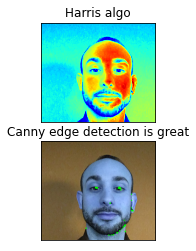

In [122]:
img = cv2.imread(path_to_file, 0)
img = np.float32(img)

corners = cv2.cornerHarris(img, 8, 1, 0.04)

plt.subplot(2,1,1), plt.imshow(img, cmap = 'jet')
plt.title('Harris algo'), plt.xticks([]), plt.yticks([])

img2 = cv2.imread(path_to_file)

corners2 = cv2.dilate(corners, None, iterations = 7)
img2[corners2>0.01*corners2.max()] = [0, 255, 0]

plt.subplot(2,1,2), plt.imshow(img2, cmap = 'gray')
plt.title('Canny edge detection is great'), plt.xticks([]), plt.yticks([])


In [136]:
path_to_file ='./images/Me.JPG'
# SIFT, SURF

In [16]:
image = cv2.imread(path_to_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
#surf.hessianThreshold = 500


keypoints = sift.detect(gray, None)
print('Number of points detected: ', len(keypoints))

image = cv2.drawKeypoints(image, keypoints,outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of points detected:  2013


 <center> <b>FAST algorithm</b> , Works well with real time processing </center>

In [10]:
import cv2
import numpy as np

path_to_file ='./images/leave.JPG'

In [85]:
image = cv2.imread(path_to_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray, None)

print(len(keypoints), 'Keypoints found')

image = cv2.drawKeypoints(gray, keypoints,outImage = None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('FAST', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

721 Keypoints found


<center> <b>FAST algorithm</b> , Works well with real time processing </center>

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

path_to_file ='./images/1.JPG'
new_path = './images/2.JPG'

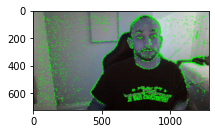

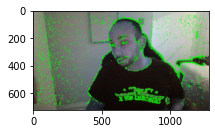

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x23a8417a130>, None)

In [14]:
image = cv2.imread(path_to_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()
fast = cv2.FastFeatureDetector_create()

keypoints = fast.detect(image, None)
keypoints, descriptors = orb.compute(image, keypoints)
image = cv2.drawKeypoints(image, keypoints, outImage = None,color=(0, 255, 0),flags=0)



plt.subplot(2, 1, 1), plt.imshow(image), plt.show()

image2 = cv2.imread(new_path)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
keypoints = fast.detect(image2, None)
keypoints, descriptors = orb.compute(image2, keypoints)
image2 = cv2.drawKeypoints(image2, keypoints, outImage = None,color=(0, 255, 0),flags=0)


plt.subplot(2, 1, 2), plt.imshow(image2), plt.show()



# Object Tracking

In [1]:
import cv2
import numpy as np
from time import sleep
#print(dir(cv2))

In [2]:
cap = cv2.VideoCapture(0)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorKNN()

while(1):
    ret, frame = cap.read()
    
    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    
    cv2.imshow('Frame',fgmask)
    #sleep(1.5)
    
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()

**Meanshift method**

In [8]:
# Initialise cam

cap = cv2.VideoCapture(0)

ret, frame = cap.read()
print(type(frame))

#Window location
r,h,c,w = 290, 160, 400, 160

track_window = (c,r,w,h)

# Crop region of interest in tracking

roi = frame[r:r+h, c:c+w]

hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Create a mask

lower_purple = np.array([125,0,0])
upper_purple = np.array([175, 255, 255])

mask = cv2.inRange(hsv_roi, lower_purple, upper_purple)

# Obtain color histogram
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])


#Normalize values to lie between range 0, 255
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Setup the termination criteria
# We stop calculating the centroid shift after ten iterations
# or if the centroid has moved at least one pixel

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while True:
    ret, frame = cap.read()
    
    if ret == True:
        
        #Convert to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        #Calculate histogram back projection
        #each pixels value is a probability
        dst =cv2.calcBackProject([hsv],[0], roi_hist, [0,180],1)
        
        # Apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        #Draw it on image
        
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w, y+h), 255, 2)
        
        cv2.imshow('Meanshift tracking', img2)
        
        if cv2.waitKey(1) == 13:
            break
    
    else:
        break
        
        
        

cap.release()
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


(480, 640, 3)
